<a href="https://colab.research.google.com/github/G-AbhilashReddy/-INTRODUCTION-TO-OPENCV-IMAGE-PROCESSING/blob/main/TensorFlow_model_for_Android_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-01-29 07:35:31--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 185.166.143.49, 185.166.143.48, 185.166.143.50, ...
Connecting to bitbucket.org (bitbucket.org)|185.166.143.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 5.9s    

2025-01-29 07:35:39 (17.0 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip


Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
tf.__version__

'2.17.1'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


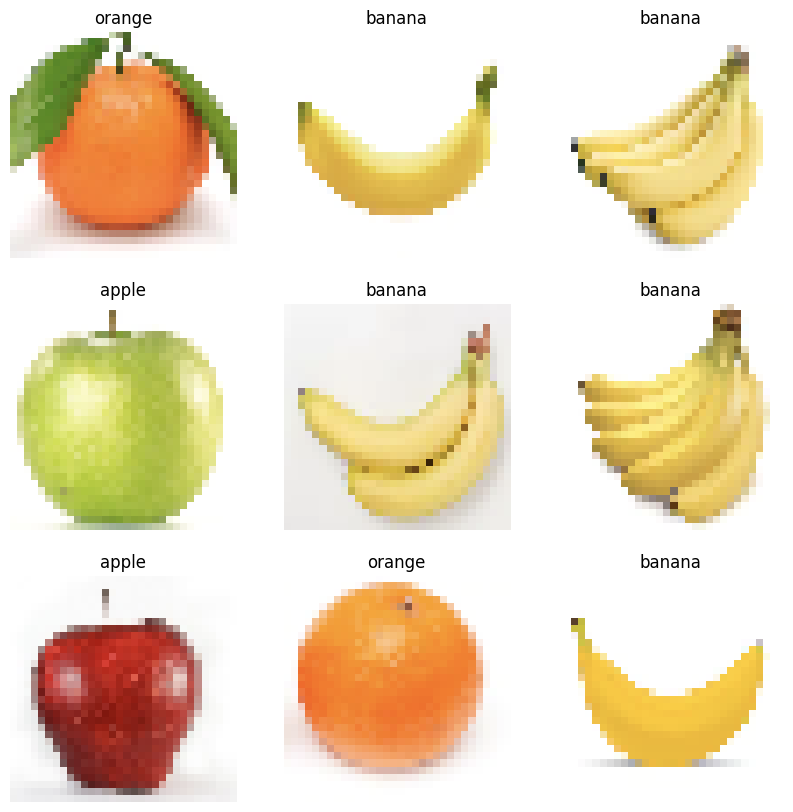

In [ ]:
class_names = ["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images , labels in train_ds.take(1):
  for i in range (9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3)
])

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.4836 - loss: 1.0625 - val_accuracy: 0.3636 - val_loss: 1.0496
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.5935 - loss: 0.9232 - val_accuracy: 0.6515 - val_loss: 0.7939
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.7337 - loss: 0.6662 - val_accuracy: 0.6667 - val_loss: 0.8700
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7877 - loss: 0.5350 - val_accuracy: 0.8788 - val_loss: 0.4219
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8546 - loss: 0.3729 - val_accuracy: 0.8636 - val_loss: 0.3285
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.8610 - loss: 0.3680 - val_accuracy: 0.8939 - val_loss: 0.2817
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9157 - loss: 0.2803 - val_accuracy: 0.8485 - val_loss: 0.3135
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8685 - loss: 0.3164 - val_accuracy: 0.9545 

In [ ]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9445 - loss: 0.2026


[0.22305455803871155, 0.9307692050933838]

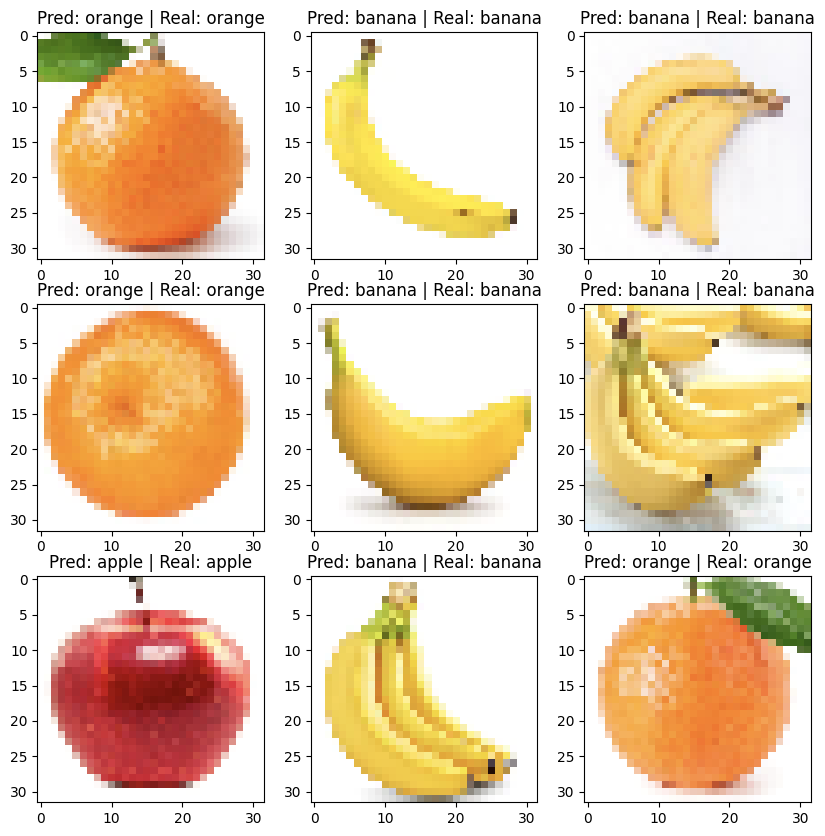

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= converter.convert()

with open("model.tflite","wb") as f:
  f.write(tflite_model)


Saved artifact at '/tmp/tmp3_ezgv5o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135371350910224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350911376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350912144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350912720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350907728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350913488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350913872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350914832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350915216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135371350916176: TensorSpec(shape=(), dtype=tf.resource, name=None)
